# **Install, Import and Initialize Libraries**

In [ ]:
# Install emoji conversion library
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
from os import path
from sklearn.utils import shuffle
import time
import warnings
warnings.filterwarnings('ignore')
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
import itertools
from collections import Counter
#Text processing
import string
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer #bag of words

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.naive_bayes import MultinomialNB # Naive Bayes
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

In [ ]:
#Download NLTK library
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# **Read Data**

In [ ]:
df=pd.read_excel('user_review_alkilanids1_newds3_unique_psu.xlsx')

In [ ]:
df.head()

,UserReviewDescription,NonFuncationalRequirment
0,Please help me to get s secure app. my mobile ...,Security
1,Cool,Usability
2,I like this app. But I sit here for 10 solid m...,Usability
3,I forgot password! How do I change it!! Help,Usability
4,Cannot find the pulse oximeter on this app,Usability


# **Exploratory Data Analyis**



In [ ]:
df.shape

(1061, 2)

In [ ]:
list(df.columns)

['UserReviewDescription', 'NonFuncationalRequirment']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserReviewDescription     1061 non-null   object
 1   NonFuncationalRequirment  1061 non-null   object
dtypes: object(2)
memory usage: 16.7+ KB


In [ ]:
df.describe()

,UserReviewDescription,NonFuncationalRequirment
count,1061,1061
unique,1013,3
top,"The gps tracks poorly, thinking I was zigzagin...",Usability
freq,2,537


In [ ]:
# Count of Null columnwise
print(df.isnull().sum())

UserReviewDescription       0
NonFuncationalRequirment    0
dtype: int64


There are no NULL values in the data

In [ ]:
# Select required coulmns
data=df[['UserReviewDescription','NonFuncationalRequirment']]

In [ ]:
data.head()

,UserReviewDescription,NonFuncationalRequirment
0,Please help me to get s secure app. my mobile ...,Security
1,Cool,Usability
2,I like this app. But I sit here for 10 solid m...,Usability
3,I forgot password! How do I change it!! Help,Usability
4,Cannot find the pulse oximeter on this app,Usability


In [ ]:
data.shape

(1061, 2)

In [ ]:
# Unique values for non functional requirements
data['NonFuncationalRequirment'].unique()

array(['Security', 'Usability', 'Performance'], dtype=object)

In [ ]:
category_requirement=data['NonFuncationalRequirment'].value_counts()
print(category_requirement)

Usability      537
Performance    475
Security        49
Name: NonFuncationalRequirment, dtype: int64


<Axes: >

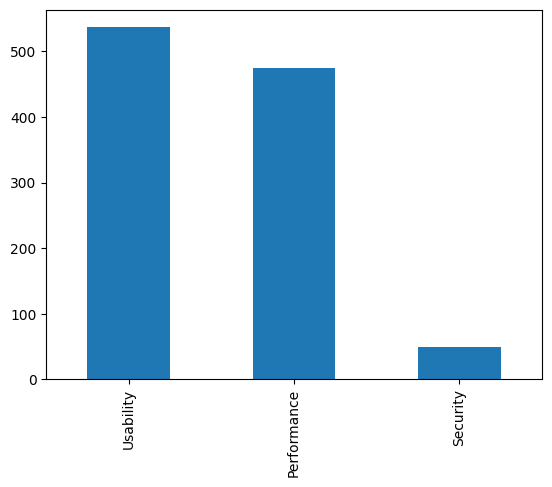

In [ ]:
#Data Visualization
category_requirement.plot(kind="bar", fontsize=10)

In [ ]:
data.shape

(1061, 2)

Class is imbalanced

# **Text Pre-Processing**

In [ ]:
# Remove punctuations, non alphabetic characters, lower and stop words 
def text_process(review):
      
      stops = set(stopwords.words('english'))                         # Defining stop words
          
      review = re.sub('[\n\t\r]+',' ',review)                         # Remove linebreak, tab, return
      review = review.lower()                                         # Convert to lower case
      review = re.sub('[0-9]',' ',review)                             #remove numbers
      modified_sentence=""
      words = nltk.word_tokenize(review)                              # Word Tokenization 
      words_without_stops = [w for w in words if not w in stops]
      modified_sentence =  ' '.join(words_without_stops)
      modified_sentence=modified_sentence.strip()
      review = re.sub('['+string.punctuation+']+','',\
                  modified_sentence)                                  # Remove Punctuations     
      review = re.sub('\s+\s+',' ',review) 
      review=review.strip()                            
      return(review)

In [ ]:
# Emoji conversion
def emoji_conversion(review):
    for emot in UNICODE_EMOJI:
        review = review.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return review

In [ ]:
# Normalization
lemmatizer = WordNetLemmatizer()

# Lemmatization
def lemmatize(review):
    words = nltk.word_tokenize(review)
    review_lemmatized = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return review_lemmatized

In [ ]:
def getCleanReview(review): 
    clean_review = ''
    review = review.strip()
    review = " ".join(review.split())
    review = text_process(review)
    review = emoji_conversion(review)
    review = lemmatize(review)
    clean_review = review
    return clean_review

In [ ]:
%time
cleaned_reviews=[]
for index, row in data.iterrows():
  review = getCleanReview(row['UserReviewDescription'])
  #print(review)
  # Append the cleaned review to the list
  cleaned_reviews.append(review)

# Add the cleaned reviews as a new column in the DataFrame
data['cleaned_reviews'] = cleaned_reviews


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [ ]:
data.head()

,UserReviewDescription,NonFuncationalRequirment,cleaned_reviews
0,Please help me to get s secure app. my mobile ...,Security,please help get secure app mobile j prime secu...
1,Cool,Usability,cool
2,I like this app. But I sit here for 10 solid m...,Usability,like app sit solid minute trying get stress re...
3,I forgot password! How do I change it!! Help,Usability,forgot password change help
4,Cannot find the pulse oximeter on this app,Usability,find pulse oximeter app


In [ ]:
data.tail()

,UserReviewDescription,NonFuncationalRequirment,cleaned_reviews
1056,Drains the battery,Performance,drain battery
1057,"It's a great app, and I like the October updat...",Performance,s great app like october update mostly found o...
1058,My second attempt.. The steps revert to 0 for ...,Performance,second attempt step revert apparent reason cau...
1059,My galaxy note 5 is not supporting health app ...,Usability,galaxy note supporting health app showing mine...
1060,Battery drain and can't sync data with my gear...,Usability,battery drain ca nt sync data gear


In [ ]:
#Tokenize clean reviews 
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

data["tokens"] = data["cleaned_reviews"].apply(tokenizer.tokenize)
data.head()

,UserReviewDescription,NonFuncationalRequirment,cleaned_reviews,tokens
0,Please help me to get s secure app. my mobile ...,Security,please help get secure app mobile j prime secu...,"[please, help, get, secure, app, mobile, j, pr..."
1,Cool,Usability,cool,[cool]
2,I like this app. But I sit here for 10 solid m...,Usability,like app sit solid minute trying get stress re...,"[like, app, sit, solid, minute, trying, get, s..."
3,I forgot password! How do I change it!! Help,Usability,forgot password change help,"[forgot, password, change, help]"
4,Cannot find the pulse oximeter on this app,Usability,find pulse oximeter app,"[find, pulse, oximeter, app]"


In [ ]:
#extracts all the words from the "tokens" column and stores it as a list
all_words = [word for tokens in data["tokens"] for word in tokens]
#length of tokens from the tokens column
sentence_lengths = [len(tokens) for tokens in data["tokens"]]
#sorted list of unique words
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

15979 words total, with a vocabulary size of 2615
Max sentence length is 97


# **Bag of Words**

In [ ]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
# Fit and transform the 'cleaned_reviews' column
bag_of_words = vectorizer.fit_transform(data['cleaned_reviews'])
bag_of_words

<1061x2592 sparse matrix of type '<class 'numpy.int64'>'
	with 14101 stored elements in Compressed Sparse Row format>

In [ ]:
# Convert the bag-of-words representation to an array
bag_of_words_array = bag_of_words.toarray()
bag_of_words_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Create column names for the bag-of-words features
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# Create a new column in the DataFrame for each feature
for i, feature_name in enumerate(feature_names):
    data[feature_name] = bag_of_words_array[:, i]

In [ ]:
data.head()

,UserReviewDescription,NonFuncationalRequirment,cleaned_reviews,tokens,aap,ability,able,absolutely,absolutly,absurd,...,yo,you,yr,zenwatch,zero,zigzaging,zone,zoom,धन,यव
0,Please help me to get s secure app. my mobile ...,Security,please help get secure app mobile j prime secu...,"[please, help, get, secure, app, mobile, j, pr...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cool,Usability,cool,[cool],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,I like this app. But I sit here for 10 solid m...,Usability,like app sit solid minute trying get stress re...,"[like, app, sit, solid, minute, trying, get, s...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,I forgot password! How do I change it!! Help,Usability,forgot password change help,"[forgot, password, change, help]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cannot find the pulse oximeter on this app,Usability,find pulse oximeter app,"[find, pulse, oximeter, app]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=data.drop(['UserReviewDescription','cleaned_reviews','tokens'], axis=1)
data.head()

,NonFuncationalRequirment,aap,ability,able,absolutely,absolutly,absurd,accept,acceptable,access,...,yo,you,yr,zenwatch,zero,zigzaging,zone,zoom,धन,यव
0,Security,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Usability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Usability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Usability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Usability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Train Test Split**

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
X = data.drop(['NonFuncationalRequirment'],axis=1)
y = data['NonFuncationalRequirment']

In [ ]:
#Label encode target
l_encode = LabelEncoder()
l_encode.fit(y)
y= l_encode.transform(y)
y

array([1, 2, 2, ..., 0, 2, 2])

In [ ]:
y[0]

1

In [ ]:
d=pd.DataFrame(y)
d

,0
0,1
1,2
2,2
3,2
4,2
5,2
6,0
7,2
8,2
9,0


Classes -->  Performance 0, Security 1, Usability 2

In [ ]:
#Split the dataset into train and test and print the shape of the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"Complete Dataset Shape: {X.shape}")
print(f"Complete Dataset Target Shape: {y.shape}")
print(f"Training Data Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}")
print(f"Test Target Shape: {y_test.shape}")

Complete Dataset Shape: (1061, 2592)
Complete Dataset Target Shape: (1061,)
Training Data Shape: (848, 2592)
Training Target Shape: (848,)
Test Data Shape: (213, 2592)
Test Target Shape: (213,)


In [ ]:
X_train

,aap,ability,able,absolutely,absolutly,absurd,accept,acceptable,access,accessing,...,yo,you,yr,zenwatch,zero,zigzaging,zone,zoom,धन,यव
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y_train

array([0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2,

# **Training Random Forest Model**

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight="balanced",random_state=1) 

In [ ]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

## **Metrics**

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2])

### **Confusion Metrics**

In [ ]:
# y_pred_rf_class=np.argmax(y_pred_rf,axis=1)
# y_pred_rf_class

In [ ]:
# y_test_rf_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred_rf)

array([[55,  0, 41],
       [ 2,  2,  6],
       [42,  2, 63]])

### **Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56        96
           1       0.50      0.20      0.29        10
           2       0.57      0.59      0.58       107

    accuracy                           0.56       213
   macro avg       0.54      0.45      0.48       213
weighted avg       0.56      0.56      0.56       213



# **Training NaiveBayes Model**

In [ ]:
#Compute class weights
from sklearn.utils.class_weight import compute_class_weight
# Calculate class weights based on the imbalance in the dataset
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights

array([0.7445614 , 7.21768707, 0.65859714])

In [ ]:
# Create a Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=1,class_prior=class_weights)

In [ ]:
# Train the classifier
nb_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1, class_prior=array([0.7445614 , 7.21768707, 0.65859714]))

## **Metrics**

In [ ]:
# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)
y_pred_nb

array([0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2,
       1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2,
       2, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 1,
       2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0])

### **Confusion Metrics**

In [ ]:
# y_pred_nb_class=np.argmax(y_pred_nb,axis=1)
# y_pred_nb_class

In [ ]:
# y_test_nb_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred_nb)

array([[57, 12, 27],
       [ 3,  5,  2],
       [39, 20, 48]])

### **Classification report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58        96
           1       0.14      0.50      0.21        10
           2       0.62      0.45      0.52       107

    accuracy                           0.52       213
   macro avg       0.44      0.51      0.44       213
weighted avg       0.58      0.52      0.54       213

